# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя:

Дата выдачи: <span style="color:red">__20 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__6 марта 23:59__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2024`

In [86]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

0. В решении будем пользоваться формулой вычисления производной композиции функций для матричного исчисления. Введём обозначения для применения оператора набла:
$\nabla_{\mathit{X}}f := \dfrac{\partial f}{\partial \mathit{X}}$, где $\mathit{X}\in \mathbb{R}^{m \times n}$, а также $\nabla_{\overrightarrow{x}}f := \left(\dfrac{\partial f}{\partial \overrightarrow{x}}\right)^{T}$, где $\overrightarrow{x} \in \mathbb{R}^{n \times 1}$. Учтём также, что взятие оператора набла от скалярной функции для скалярного аргумента - это вектор, состоящий из одной частной производной. Также важным будет отметить, что $\nabla_{x}\overrightarrow{f} := \left(\nabla_{x} f_{1}, \: \nabla_{x} f_{2}, \: \ldots, \: \nabla_{x} f_{n}\right)^{T}$. С учётом этих замечаний найдём необходимые нам градиенты.

1. $\nabla_{\gamma}\mathcal{L} = \nabla_{y} \mathcal{L} \cdot \nabla_{\gamma}y = \nabla_{y} \mathcal{L} \cdot \left( \frac{\partial y_1}{\partial \gamma}, \: \ldots, \: \frac{\partial y_{n + 1}}{\partial \gamma}\right)^{T} = \nabla_{y} \mathcal{L} \cdot \left( \tilde{y}_1, \: \ldots, \: \tilde{y}_{n + 1}\right)^{T} = \nabla_{y} \mathcal{L} \cdot \tilde{y}$
2. $\nabla_{\delta}\mathcal{L} = \nabla_{y} \mathcal{L} \cdot \nabla_{\delta}y = \nabla_{y} \mathcal{L} \cdot \left( \frac{\partial y_1}{\partial \delta}, \: \ldots, \: \frac{\partial y_{n + 1}}{\partial \delta}\right)^{T} = \nabla_{y} \mathcal{L} \cdot \left( 1, \: \ldots, \: 1\right)^{T} = \nabla_{y} \mathcal{L}$
3. $\nabla_{\mathit{X}}\mathcal{L} = \nabla_{y} \mathcal{L} \cdot \nabla_{\mathit{X}} \: y = \gamma \nabla_{y} \mathcal{L} \cdot \nabla_{\mathit{X}} \: \tilde{y}$. Запишем элемент матрицы $\nabla_{\mathit{X}} \: \tilde{y}$ в позиции $(i, \: j)$:

$\dfrac{\partial \tilde{y}_{i}}{\partial X_j} = \dfrac{([i = j] - \frac{1}{n}) \sqrt{\sigma^2 + \varepsilon} \: - (X_i - \mu)\left(\frac{1}{2\sqrt{\sigma^2 + \varepsilon}} \cdot \dfrac{2}{n} \sum_{k = 1}^{n}(X_k - \mu)([k = j] - \frac{1}{n})\right)}{\sigma^2 + \varepsilon} =$

$= \dfrac{([i = j] - \frac{1}{n}) (\sigma^2 + \varepsilon) \: - \dfrac{(X_i - \mu)}{n}\sum_{k = 1}^{n}(X_k - \mu)([k = j] - \frac{1}{n})}{(\sigma^2 + \varepsilon)^{\frac{3}{2}}} = \dfrac{([i = j] - \frac{1}{n}) (\sigma^2 + \varepsilon) \: - \dfrac{(X_i - \mu)}{n} \left( - \frac{1}{n} \sum_{k = 1}^{n}(X_k - \mu) + (X_j - \mu) \right) }{(\sigma^2 + \varepsilon)^{\frac{3}{2}}} =$

$= \dfrac{([i = j] - \frac{1}{n}) (\sigma^2 + \varepsilon) \: - \dfrac{(X_i - \mu)(X_j - \mu)}{n}}{(\sigma^2 + \varepsilon)^{\frac{3}{2}}} = \begin{cases} \dfrac{n - 1}{n\sqrt{\sigma^2 + \varepsilon}} - \dfrac{(X_i - \mu)^2}{n(\sigma^2 + \varepsilon)^{\frac{3}{2}}}, i = j \\ -\dfrac{1}{n\sqrt{\sigma^2 + \varepsilon}} - \dfrac{(X_i - \mu)(X_j - \mu)}{n(\sigma^2 + \varepsilon)^{\frac{3}{2}}}, i \neq j\end{cases}$

Обозначим за $I \in \mathbb{R}^{n \times n}$ единичную матрицу
$\begin{pmatrix}
    1 & 0 & \ldots & 0 \\
    0 & 1 & \ldots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \ldots & 1
\end{pmatrix}$, за $E \in \mathbb{R}^{n \times n}$ обозначим матрицу
$\begin{pmatrix}
    1 & 1 & \ldots & 1 \\
    1 & 1 & \ldots & 1 \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & 1 & \ldots & 1
\end{pmatrix}$, состоящую из всех единиц, а за $\bar{\mathbf{1}} \in \mathbb{R}^{n \times 1}$ вектор
$\begin{pmatrix}
    1 & 1 & \ldots & 1
\end{pmatrix}^T$, состоящий из всех единиц. Тогда $\nabla_{\mathit{X}} \: \tilde{y} = \dfrac{1}{\sqrt{\sigma^2 + \varepsilon}} I - \dfrac{1}{n\sqrt{\sigma^2 + \varepsilon}}E - \dfrac{(X - \mu\bar{\mathbf{1}})(X - \mu\bar{\mathbf{1}})^T}{n(\sigma^2 + \varepsilon)^{\frac{3}{2}}}$

Тогда $\nabla_{\mathit{X}}\mathcal{L} = \dfrac{\gamma}{\sqrt{\sigma^2 + \varepsilon}} \nabla_{y} \mathcal{L}\left(I - \dfrac{1}{n}E - \dfrac{(X - \mu\bar{\mathbf{1}})(X - \mu\bar{\mathbf{1}})^T}{n(\sigma^2 + \varepsilon)} \right)$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

1. Для верной инициализации весов мы должны добиться того, чтобы дисперсия и математическое ожидание активаций $y^{l}_{i}$ были одинаковы от слоя к слою при прямом проходе ($forward$), то есть $\forall l \in \overline{1, L}, \ \ \forall i \in \overline{1, n_{l+1}}, \ \ \forall j \in \overline{1, n_l} \ \ \begin{cases}\mathbb{E}y^l_i = \mathbb{E}y^{l-1}_i \\ \mathbb{D}y^l_i = \mathbb{D}y^{l-1}_i \end{cases}$, а при обратном проходе ($backward$) градиенты функции потерь по активациям тоже имели одинаковые математическое ожидание и дисперсию от слоя к слою, то есть $\forall l \in \overline{1, L}, \ \ \forall i \in \overline{1, n_{l+1}}, \ \ \forall j \in \overline{1, n_l} \ \ \begin{cases}\mathbb{E}\left[\dfrac{\partial \mathcal{L}}{\partial y^l_i}\right] = \mathbb{E}\left[\dfrac{\partial \mathcal{L}}{\partial y^{l-1}_i}\right] \\ \mathbb{D}\left[\dfrac{\partial \mathcal{L}}{\partial y^l_i}\right] = \mathbb{D}\left[\dfrac{\partial \mathcal{L}}{\partial y^{l-1}_i}\right] \end{cases}$ Перед началом докажем 2 пункта из подсказок.
2. Покажем, что $\mathbb{E} W^l_{ij} = 0\ \ \forall i \in \overline{1, n_{l+1}}, \ j \in \overline{1, n_{l}}$ с учётом пунктов 6 и 7.

Известно, что $p_{W_{ij}^{l}}(-x) = p_{W_{ij}^{l}}(x) \Rightarrow \mathbb{E} W^l_{ij} = \int^{+\infty}_{-\infty}xp_{W_{ij}^{l}}(x)dx = \int^{0}_{-\infty}xp_{W_{ij}^{l}}(x)dx + \int^{+\infty}_{0}xp_{W_{ij}^{l}}(x)dx = \int^{0}_{-\infty}(-x)p_{W_{ij}^{l}}(-x)d(-x) + \int^{+\infty}_{0}xp_{W_{ij}^{l}}(x)dx = [\textit{делаем замену в первом интеграле с последующим переименованием переменной}] = \int^{0}_{+\infty}xp_{W_{ij}^{l}}(x)d(x) + \int^{+\infty}_{0}xp_{W_{ij}^{l}}(x)dx = - \int^{+\infty}_{0}xp_{W_{ij}^{l}}(x)d(x) + \int^{+\infty}_{0}xp_{W_{ij}^{l}}(x)dx = 0$

3. Покажем, что $\mathbb{E}y^l_i = 0 \ \ \forall i \in \overline{1, n_{l+1}}, \ \forall l \in \overline{1, L}$.

$\mathbb{E}y^l_i = [\textit{учитываем, что вектор сдвига нулевой}] = \mathbb{E}[(W^lx^l)_i] = \mathbb{E} \left[ \sum_{k=1}^{n_l}W^l_{ik}x^l_k \right] = \sum_{k=1}^{n_l}\mathbb{E} \left[W^l_{ik}x^l_k \right] = [\textit{пункт 5, пункт 1}] = n_l \ \mathbb{E}W^l_{i1} \ \mathbb{E}x^l_1 = 0 \ \ \textit{так как} \ \ \mathbb{E}W^l_{i1} = 0 \ \ [\textit{Пункт 2 доказательства}]$

4. Покажем, что плотность распределения $p_{y^l_i}(x) = p_{y^l_i}(-x) \ \forall i \in \overline{1, n_{l+1}}, \ \forall l \in \overline{1, L}$

Чтобы $p_{y^l_i}(x) = p_{y^l_i}(-x)$, то есть плотность распределения была чётной, плотности распределения $y^l_i$ и $-y^l_i$ должны совпадать: $p_{-y^l_i}(x) = p_{y^l_i}(x)$.
Запишем, чему равна плотность распределения $-y^l_i$.

$p_{y^l_i}(-x) = p_{\sum_{k=1}^{n_l}(-W^l_{ik})x^l_k}(x) = [\textit{плотность распределения суммы - это свёртка плотностей}] = (p_{(-W^l_{i1})x^l_1} \ast \ldots \ast p_{(-W^l_{in_l})x^l_{n_l}})(x)$. Достаточно показать, что $p_{(-W^l_{is})x^l_s}(x) = p_{W^l_{is}x^l_s}(x) \ \forall s \in \overline{1, n_l}$

По формуле плотности произведения случайных величин имеем $p_{W^l_{is}x^l_s}(x) = \int^{+\infty}_{-\infty} p_{W^l_{is}}(u)p_{x^l_s}(\frac{x}{u})du = [\textit{пункт 6}] = \int^{+\infty}_{-\infty} p_{-W^l_{is}}(u)p_{x^l_s}(\frac{x}{u})du = p_{(-W^l_{is})x^l_s}(x) \Rightarrow$ все компоненты в $y^l$ имеют чётную плотность распределения.
5. Математические ожидания активаций были рассмотрены в 3 пункте доказательства. Рассмотрим теперь дисперсию активаций.

$\mathbb{D}y^l_i = \mathbb{D}\left[\sum_{k=1}^{n_l} W_{ik}^{l}x_k^l \right] = \sum_{k=1}^{n_l} \mathbb{D}\left[W_{ik}^{l}x_k^l \right] = \sum_{k=1}^{n_l} \left( \mathbb{D}\left[W_{ik}^{l}\right] \mathbb{D}\left[ x_k^l \right] + \mathbb{D}\left[W_{ik}^{l}\right] \left( \mathbb{E}\left[x^l_k\right] \right)^2 + \mathbb{D}\left[ x_k^l \right] \underbrace{\left(\mathbb{E}\left[W^l_{ik}\right] \right)^2}_{0 \ \textit{по пункту 2}} \right) = \sum_{k=1}^{n_l} \mathbb{D}\left[W_{ik}^{l}\right] \mathbb{E}\left[(x^l_k)^2\right] = n_l \mathbb{D}\left[W_{ii}^{l}\right] \mathbb{E}\left[(x^l_i)^2\right]$

Посчитаем $\mathbb{E}\left[(x^l_i)^2\right] = \mathbb{E}\left[(max(0, y_i^{l-1}) )^2\right] = \int^{+\infty}_{-\infty}(max(0, x))^2 p_{y_i^{l-1}}(x)dx = \frac{1}{2}\int^{+\infty}_{-\infty}(x - 0)^2p_{y_i^{l-1}}(x)dx = \frac{1}{2}\mathbb{D}\left[y_{i}^{l-1}\right]$

Отсюда получаем, что $\mathbb{D}\left[y_i^l\right] = \frac{n_l}{2}\mathbb{D}\left[W_{ii}^{l}\right]\mathbb{D}\left[y_{i}^{l-1}\right]$. Поэтому, чтобы выполнялось изначальное равенство $\mathbb{D}\left[y_i^l\right] = \mathbb{D}\left[y_{i}^{l-1}\right]$, у нас должно быть выполнено, что $\mathbb{D}\left[W_{ij}^{l}\right] = \frac{2}{n_l} \ \ \forall i \in \overline{1, n_{l+1}}, \ \forall j \in \overline{1, n_l}, \ \forall l \in \overline{1, L}$

6. Рассмотрим теперь обратный проход и посчитаем математическое ожидание градиентов по активациям. Пусть $\delta_i^l = \dfrac{\partial \mathcal{L}}{\partial y_i^l}$, а также $g(x) = max(0, x)$ из условия.

Тогда $\delta_i^l = \sum_{k=1}^{n_{l+2}} \delta_k^{l+1} \dfrac{\partial y_k^{l+1}}{\partial y_i^{l}} = \sum_{k=1}^{n_{l+2}} \delta_k^{l+1} \dfrac{\partial}{\partial y_i^{l}} \left( \sum_{s=1}^{n_{l+1}}W_{ks}^{l+1}x_s^{l+1}\right) = \sum_{k=1}^{n_{l+2}} \delta_k^{l+1} \dfrac{\partial}{\partial y_i^{l}} \left( \sum_{s=1}^{n_{l+1}}W_{ks}^{l+1}g(y_s^l)\right) = \sum_{k=1}^{n_{l+2}} \delta_k^{l+1}W_{ki}^{l+1} \dfrac{\partial g}{\partial y_i^{l}}(y_i^{l}) = \sum_{k=1}^{n_{l+2}} \delta_k^{l+1}W_{ki}^{l+1} g'(y_i^{l})$

Теперь получаем, что $\mathbb{E}\left[\delta_i^l\right] = [\textit{учитываем не внесённые в условие задачи уточнения независимости всех необходимых случайных величин}] = \sum_{k=1}^{n_{l+2}} \mathbb{E}\left[\delta_k^{l+1}\right] \mathbb{E}\underbrace{\left[W_{ki}^{l+1}\right]}_{0} \underbrace{\mathbb{E}\left[g'(y_i^{l})\right]}_{\frac{1}{2}} = 0 \ \ \forall i \in \overline{1, n_{l+1}}, \ \forall l \in \overline{1, L}$

$D\left[ \delta_i^l \right] = \sum_{k=1}^{n_{l+2}} \mathbb{D}\left[\delta_k^{l+1}W_{ki}^{l+1} g'(y_i^{l})\right] = \sum_{k=1}^{n_{l+2}} \left[ \mathbb{D}\left[\delta_k^{l+1}W_{ki}^{l+1}\right] \mathbb{E}\left[(g'(y_i^{l}))^2\right] + \mathbb{D}\left[g'(y_i^{l})\right] \mathbb{E}\left[\delta_k^{l+1}\right] \underbrace{\mathbb{E}\left[W_{ki}^{l+1}\right]}_{0} \right] = \dfrac{1}{2}\sum_{k=1}^{n_{l+2}}\mathbb{D}\left[\delta_k^{l+1}W_{ki}^{l+1}\right] = \dfrac{1}{2}\sum_{k=1}^{n_{l+2}}\left[ \mathbb{D}\left[\delta_k^{l+1}\right] \mathbb{D}\left[W_{ki}^{l+1}\right] + \mathbb{D}\left[\delta_k^{l+1}\right] \underbrace{\left(\mathbb{E}\left[W_{ki}^{l+1}\right]\right)^2}_{0} + \mathbb{D}\left[W_{ki}^{l+1}\right] \underbrace{\left(\mathbb{E}\left[\delta_k^{l+1}\right]\right)^2}_{0} \right] = \dfrac{1}{2}\sum_{k=1}^{n_{l+2}} \mathbb{D}\left[\delta_k^{l+1}\right] \mathbb{D}\left[W_{ki}^{l+1}\right] = [\textit{по 1 и 4 пунктам}] = \dfrac{n_{l+2}}{2} \mathbb{D}\left[W_{ii}^{l+1}\right] \mathbb{D}\left[\delta_i^{l+1}\right]$

Чтобы было выполнено предположение о равенстве дисперсий градиентов по активациям, видно, что необходимо выполнение следующего равенства: $\mathbb{D}\left[W_{ij}^{l+1}\right] = \dfrac{2}{n_{l+2}}$, или же, что то же самое, $\mathbb{D}\left[W_{ij}^{l}\right] = \dfrac{2}{n_{l+1}} \ \ \forall i \in \overline{1, n_{l+1}}, \ \forall j \in \overline{1, n_l}, \ \forall l \in \overline{1, L}$

7. Итоговый ответ, как должны инициализироваться веса, описывается следующим образом:

$\begin{cases} \mathbb{E}\left[W_{ij}^l\right] = 0, \\ \mathbb{D}\left[W_{ij}^l\right] = \dfrac{4}{n_l + n_{l+1}} \end{cases} \ \ \forall i \in \overline{1, n_{l+1}}, \ \forall j \in \overline{1, n_l}, \ \forall l \in \overline{1, L}$

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

Причины, почему функция активации $ReLU$ предпочтительнее сигмоиды в нейронных сетях:

1. Большие затраты на вычисление экспоненты, в то время как вычисление $ReLU$ требует лишь нахождение максимума двух чисел, что является практически элементарной операцией.
2. Производная сигмоиды не превосходит $\dfrac{1}{4}$, при этом на концах она близка к $0$. Есть лишь достаточно небольшой интервал значений, где она близка к $\dfrac{1}{4}$. В глубоких нейронных сетях это будет большой проблемой в силу явления затухания градиента на $back-propagation$. Там производная сигмоиды возводится в $n$-ю степень при прохождении $n$ слоёв и умножается на градиент, из-за чего веса, близкие к началу нейронной сети будут обучаться слишком медленно, либо вообще перестанут обучаться, в чём, собственно, и заключается эффект затухания градиента. Если же рассматривать $ReLU(y)$, то $\forall y > 0$ её производная постоянна и равна 1, что сильнее ослабляет эффект затухания или взрыва градиента именно от функции активации, хотя на отрицательной полупрямой проблема всё ещё остаётся, так как там производная этой функции равна нулю.
3. Чтобы ослабить эффект затухания градиента с использованием сигмоиды необходимо центрировать входные значения, чтобы они после преобразования были в районе $0.5$, где производная сигмоиды "достаточно" отлична от нуля, в то время как $ReLU$ просто откидывает отрицательные значения, а при всех положительных её производная равна 1, что убирает необходимость специально центрировать входные данные.
4. Также $ReLU$ может создавать эффект разреженности нейронной сети, так как при отрицательных значениях нейрон всегда будет выдавать значение, равное 0, что будет делать его неактивным в некоторых случаях и создавать эффект $DropOut$, который может помочь для уменьшения переобучения.


---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [87]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:
    output = layer.forward(input)

    - Propagate gradients through itself:
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any)
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units],
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output):
        """
        Performs a backpropagation step through the layer,
        with respect to the given input.

        To compute loss gradients w.r.t input,
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument,
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel()
          applied to each gradient).
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), np.array([]) # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [88]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        self.input = input
        output = np.maximum(np.zeros_like(input), input)
        return output

    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (self.input > 0).astype(int), np.array([]) # chain rule

    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [89]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [90]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = x W + b

        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        self.input = input
        return input @ self.weights + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]

        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        d_loss_d_input = grad_output @ self.weights.T
        grad_weights = self.input.T @ grad_output
        grad_biases = np.sum(grad_output, axis=0)
        return d_loss_d_input, np.r_[grad_weights.ravel(), grad_biases.ravel()]

    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [91]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

$\nabla_{x}f = \sum_i \nabla_x y_i = \sum_i (0, \ldots, 0, \underbrace{[x_i > 0]}_{i}, 0, \ldots, 0) = ([x_1 > 0], \ldots, [x_{out} > 0])$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [92]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
relu.forward(points)
grads, _ = relu.backward(np.ones((10, 12)))

f = lambda x: np.sum(relu.forward(x), axis=0)
numeric_grads = np.zeros_like(grads)

for row in np.arange(numeric_grads.shape[0]):
    numeric_grads[row] = eval_numerical_gradient(f, points[row])

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

В реализованном слое используется формула $y = x W + b$, что отражает следующую нотацию: $w_{ij}$ - вес $i$-го объекта с $j$-м выходом. Градиент будет посчитан именно для неё.

$df = \sum_i dy_i = \sum_i \sum_k dx_k w_{ki} = \sum_k dx_k \sum_i w_{ki} = \left< (\sum_i w_{1i}, \ \ldots, \ \sum_i w_{input, \ i} ), \: dx\right> \Rightarrow \nabla_xf = (\sum_i w_{1i}, \ \ldots, \ \sum_i w_{input, \ i} ) = W \cdot \bar{\mathbb{1}}$

Для $y = W x + b$ будет $W ^ T \cdot \bar{\mathbb{1}}$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [93]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
linear.forward(points)
grads , _ = linear.backward(np.ones((10, 32)))

f = lambda x: np.sum(linear.forward(x), axis=0)
numeric_grads = np.zeros_like(grads)

for row in np.arange(numeric_grads.shape[0]):
    numeric_grads[row] = eval_numerical_gradient(f, points[row])

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [94]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [95]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def softmax(self, input, axis=-1):
        """
        Applies softmax to each row
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        shifted_input = input - np.max(input, axis=1, keepdims=True)
        output = np.exp(shifted_input) / np.sum(np.exp(shifted_input), axis=axis, keepdims=True)
        return output

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.input = input
        output = input - logsumexp(input, axis=1).reshape(-1, 1)
        return output

    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        return grad_output - np.sum(grad_output, axis=1).reshape(-1, 1) * self.softmax(self.input, axis=1), np.array([])

    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [96]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    return np.sum(activations[np.arange(target.shape[0]), target], axis=0) / (-target.shape[0])

def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    return target / (-target.shape[0])

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [97]:
def target_mask(target, num_classes):
    target_mask = np.zeros((target.shape[0], num_classes))
    target_mask[np.arange(target.shape[0]), target] = 1
    return target_mask

In [98]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

### your code here
mask = target_mask(target, d)

activations = lsm.forward(points)
grads, _ = lsm.backward(grad_NLL(activations, mask))

f = lambda x: NLL(lsm.forward(x), target)
numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
from sklearn.datasets import load_digits

In [101]:
X, y = load_digits(return_X_y=True)

In [102]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [105]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [106]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size

        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [107]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [108]:
def forward(network, X):
    """
    Perform forward pass through the network.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output:
    output shape: [batch, out_features_num]
    """
    current_data = X.copy()
    for layer in network:
        current_data = layer.forward(current_data)
    return current_data

Дополнительная реализация обратного прохода

In [109]:
def backward(network, grad_loss):
    """
    Perform backward pass through the network.

    network: list of layers
    grad_loss: loss gradient w.r.t. network output
    grad_loss shape: [batch, num_classes]

    output: gradient
    output shape: [batch, num_params]
    """
    current_grad = grad_loss.copy()
    output = []
    for layer in network[::-1]:
        current_grad, grad_params = layer.backward(current_grad)
        output = grad_params.tolist() + output
    return np.array(output)

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [110]:
def predict(network, X):
    """
    Returns predictions for each object in X.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    return np.argmax(forward(network, X), axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [111]:
from scipy.optimize import minimize

In [112]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [113]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [114]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]

    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)

    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    network_output = forward(network, X)
    grad_weights = backward(network, grad_NLL(network_output, target_mask(y, network_output.shape[1])))
    loss = NLL(network_output, y)
    return loss, grad_weights

Теперь мы готовы обучать нашу нейросеть.

In [115]:
weights = get_weights(network)

In [116]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [117]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [118]:
res["nit"] # number of iterations (should be >> 10)

118

In [119]:
res["success"] # should be True

True

In [120]:
res["x"] # learned weights

array([ 0.00474122, -0.01361731, -0.00725737, ..., -0.83020246,
       -2.40264259, -0.74203835])

In [121]:
res['message']

'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [122]:
### your code here
set_weights(res['x'], network)
print('NLL (Train / Test): {:.5}, {:.5}'.format(NLL(forward(network, X_train), y_train), NLL(forward(network, X_test), y_test)))
print('Accuracy (Train / Test): {:.5}, {:.5}'.format(np.sum(predict(network, X_train) == y_train) / y_train.shape[0],
                                               np.sum(predict(network, X_test) == y_test) / y_test.shape[0]))

NLL (Train / Test): 6.2923e-07, 1.3061
Accuracy (Train / Test): 1.0, 0.93778


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [123]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []

    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        ### your code here
        self.train_acc.append(np.sum(predict(self.network, self.X_train) == self.y_train) / self.y_train.shape[0])
        self.test_acc.append(np.sum(predict(self.network, self.X_test) == self.y_test) / self.y_test.shape[0])

        if self.print:
            print('Accuracy (Train / Test): {:.5}, {:.5}'.format(self.train_acc[-1], self.test_acc[-1]))

In [124]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Accuracy (Train / Test): 0.10616, 0.084444
Accuracy (Train / Test): 0.13289, 0.14
Accuracy (Train / Test): 0.20416, 0.22667
Accuracy (Train / Test): 0.2242, 0.25333
Accuracy (Train / Test): 0.26503, 0.28889
Accuracy (Train / Test): 0.32294, 0.33778
Accuracy (Train / Test): 0.35783, 0.35556
Accuracy (Train / Test): 0.42094, 0.41333
Accuracy (Train / Test): 0.48404, 0.48222
Accuracy (Train / Test): 0.56867, 0.52222
Accuracy (Train / Test): 0.61024, 0.57556
Accuracy (Train / Test): 0.66964, 0.64222
Accuracy (Train / Test): 0.71269, 0.70444
Accuracy (Train / Test): 0.74833, 0.71778
Accuracy (Train / Test): 0.76466, 0.73111
Accuracy (Train / Test): 0.77357, 0.75333
Accuracy (Train / Test): 0.78471, 0.75778
Accuracy (Train / Test): 0.80252, 0.77778
Accuracy (Train / Test): 0.83073, 0.8
Accuracy (Train / Test): 0.83445, 0.82
Accuracy (Train / Test): 0.85523, 0.83111
Accuracy (Train / Test): 0.86266, 0.83778
Accuracy (Train / Test): 0.88196, 0.87333
Accuracy (Train / Test): 0.88864, 0.88
Accur

Изобразите на графике кривую качества на обучени и контроле по итерациям:

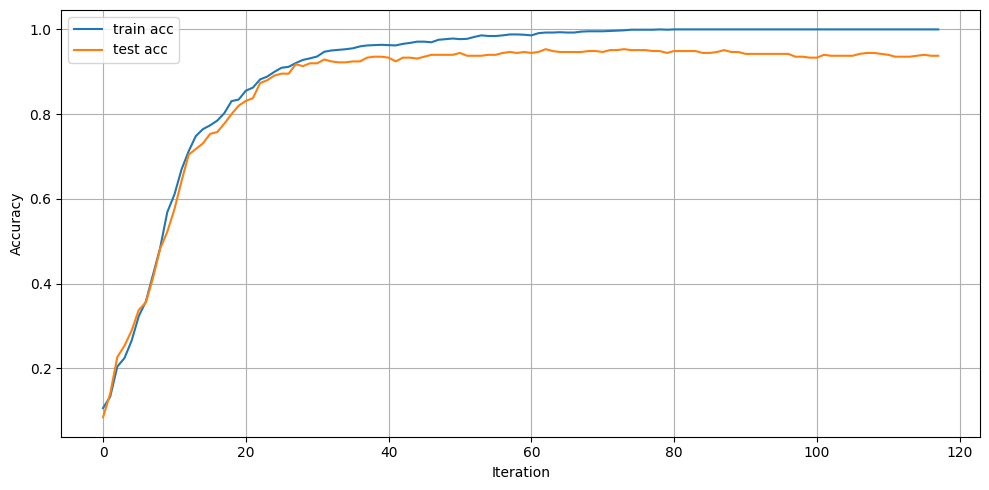

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [126]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [127]:
### your code here
for i in range(5):
    for j in range(5):
        network = make_network(input_size=X_train.shape[1],
                               output_size=10,
                               n_layers=(i + 1),
                               hidden_layers_size=32)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(compute_loss_grad, weights,
                       args=[network, X_train, y_train],
                       method="L-BFGS-B",
                       jac=True,
                       callback=cb.call)
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

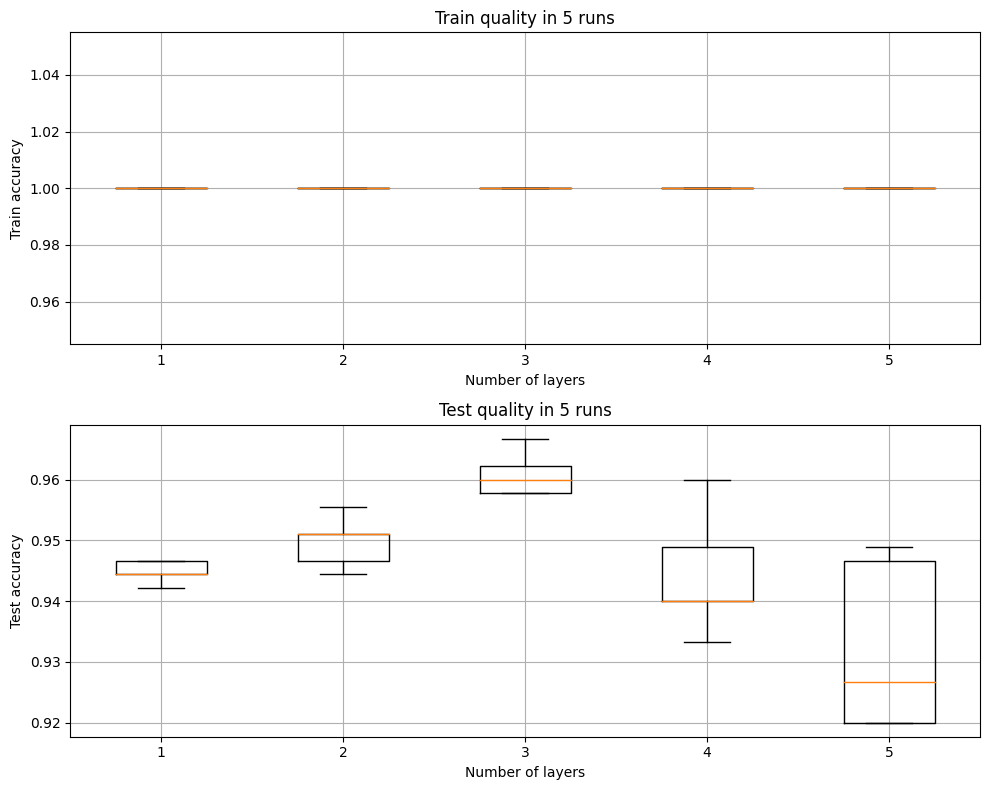

In [128]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

1. Качество на обучении при изменении числа слоёв осталось без изменений равным единице, однако качество на контроле имеет максимум при не очень маленьком и не очень большом числе слоёв, так как маленькое число слоёв будет приводить к возможному недообучению, а большое число слоёв, наоборот, больше подстраивает сеть под обучающую выборку, что ведёт к переобучению. Также видно, что устойчивость процесса обучения ухудшается с увеличением числа слоёв. Так, при 5 слоях обучение самое неустойчивое.
2. Любую линейную модель можно рассматривать как нейронную сеть с одним линейным слоем и определённой функцией потерь (для логистической регрессии, соответственно, log-loss). Здесь логистической регрессией выступает нейронная сеть с одним линейным слоем. По графику видно, что она хуже, чем нейронная сеть с 3 слоями и нелинейностью.

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [129]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                # layer.weights[:, :] = np.random.normal(0, 4 / (input_units + output_units), size=(input_units, output_units))
                layer.weights[:, :] = np.random.normal(0, (2 / output_units) ** 0.5, size=(input_units, output_units))
            elif initialization == 'Xavier':
                # layer.weights[:, :] = np.random.normal(0, 2 / (input_units + output_units), size=(input_units, output_units))
                layer.weights[:, :] = np.random.normal(0, (1 / output_units) ** 0.5, size=(input_units, output_units))
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)

            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [130]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [131]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [132]:
### your code here
for i in range(5):
    for j in range(5):
        network = make_network(input_size=X_train.shape[1],
                               output_size=10,
                               n_layers=3,
                               hidden_layers_size=32)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(compute_loss_grad, weights,
                       args=[network, X_train, y_train],
                       method="L-BFGS-B",
                       jac=True,
                       callback=cb.call)
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

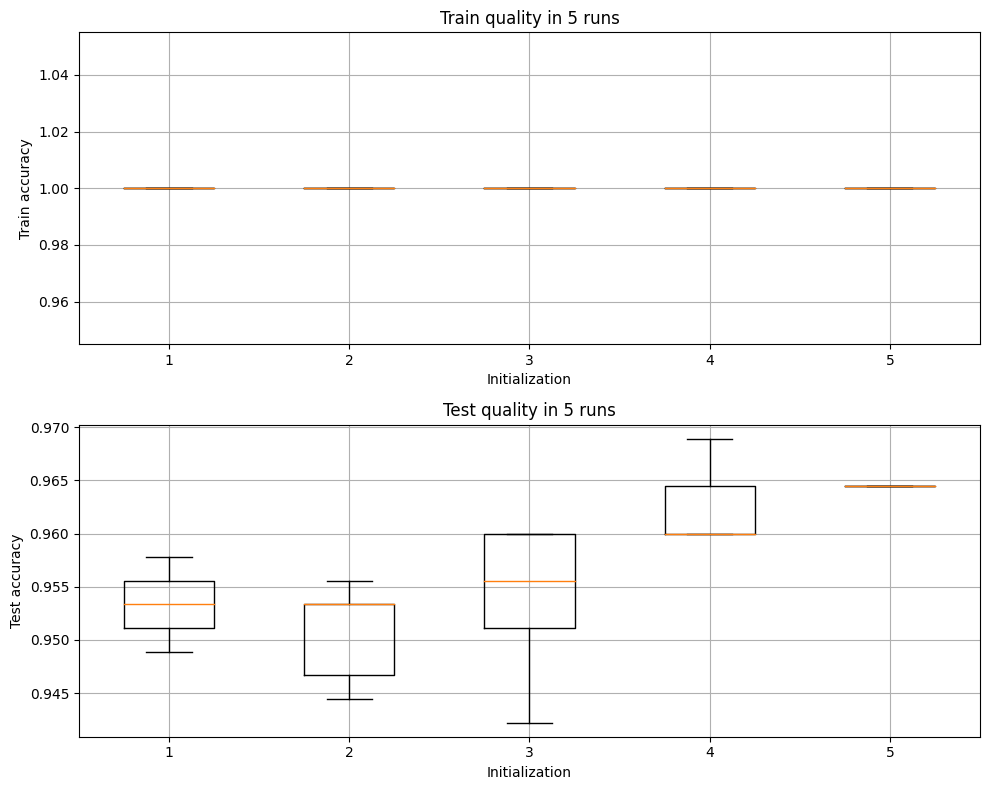

In [133]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [134]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [135]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [136]:
### your code here
for i in range(5):
    for j in range(5):
        network = make_network(input_size=X_train.shape[1],
                               output_size=10,
                               n_layers=4,
                               hidden_layers_size=32)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(compute_loss_grad, weights,
                       args=[network, X_train, y_train],
                       method="L-BFGS-B",
                       jac=True,
                       callback=cb.call)
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

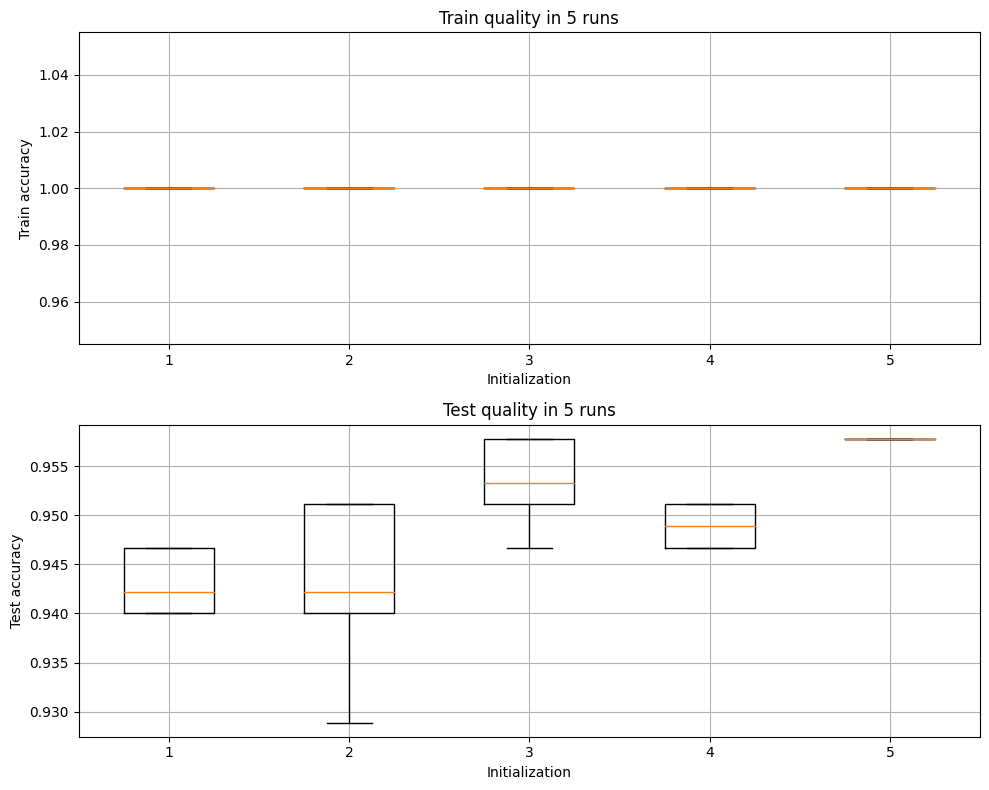

In [137]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [138]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [139]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [140]:
### your code here
for i in range(5):
    for j in range(5):
        network = make_network(input_size=X_train.shape[1],
                               output_size=10,
                               n_layers=5,
                               hidden_layers_size=32)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(compute_loss_grad, weights,
                       args=[network, X_train, y_train],
                       method="L-BFGS-B",
                       jac=True,
                       callback=cb.call)
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

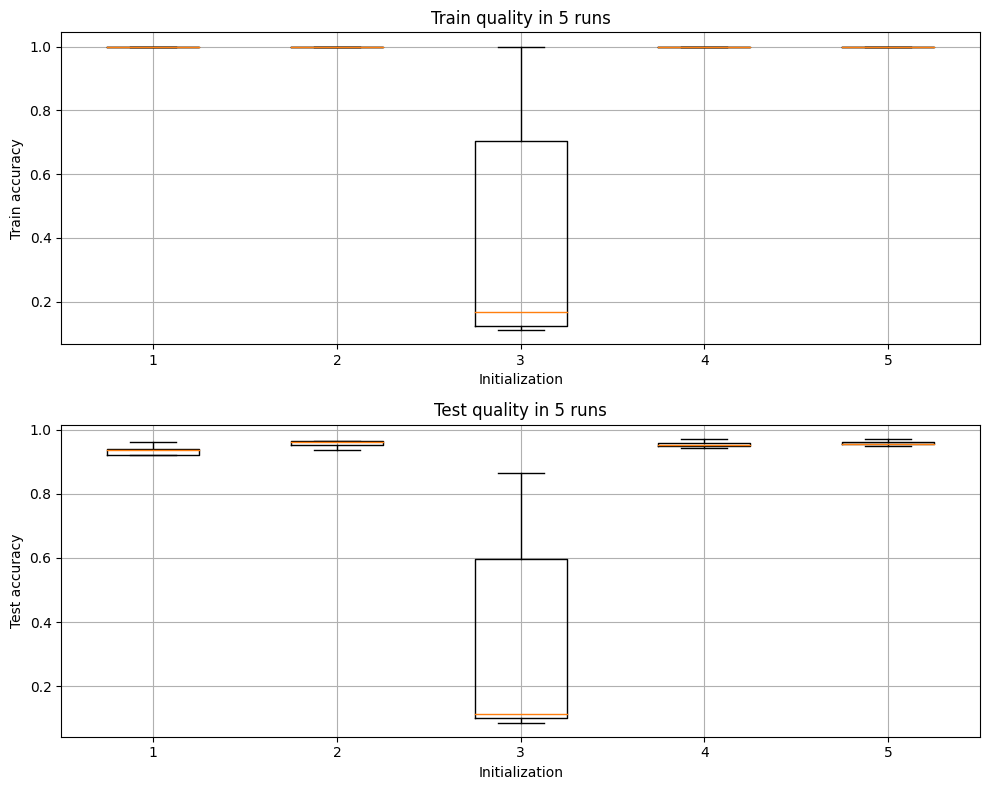

In [141]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

1. Видно, что на обучении качество нигде не менялось, кроме случайной инициализации из стандартного нормального распределения при 5 слоях, где качество сильно упало. На контроле же мы видим, что инициализации Кейминга и Ксавьера наиболее устойчивы. Ксавьер показывает лучшее качество.
Устойчивость обучения при разных инициализациях зависит от числа слоёв. Например, при 3 слоях стандартное нормальное распределение наиболее усточиво в данных экспериментах. Однако на 5 слоях картина меняется в худшую сторону.  

2. Инициализации Кейминга и Ксавьера помогают обучать более глубокие нейронные сети для соответствующих функций активации, так как они основаны на препятствии затуханию градиента. Обычная случайная инициализация не гарантирует стабильность градиента в глубоких нейронных сетях.

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [142]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [143]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [144]:
### your code here
for i in range(5):
    network = make_network(input_size=X_train.shape[1],
                            output_size=10,
                            n_layers=4,
                            hidden_layers_size=32)
    initialize_network(network, init_vars[i])
    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = minimize(compute_loss_grad, weights,
                    args=[network, X_train, y_train],
                    method="L-BFGS-B",
                    jac=True,
                    callback=cb.call)
    accs_train_on_iterations.append(cb.train_acc)
    accs_test_on_iterations.append(cb.test_acc)

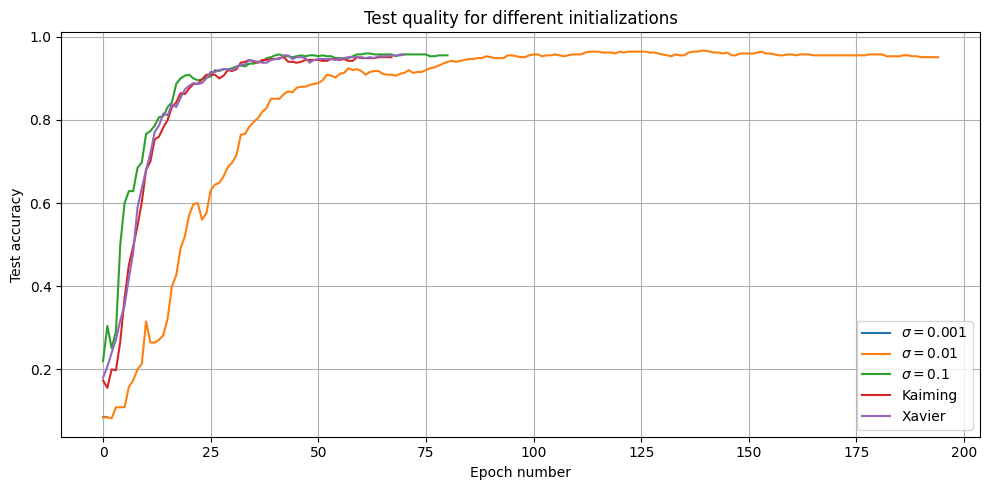

In [145]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars_for_plot):
    ax.plot(accs_test_on_iterations[idx], label=label)
ax.set_title("Test quality for different initializations")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Test accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

1. Быстрее всего сходится сеть с инициализацией Кейминга, на втором месте - инициализация Ксавьера
2. Слишком маленькая дисперсия показала ужасный результат, так как сеть вообще не обучалась

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [146]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.tanh = np.tanh(input)
        return self.tanh

    def backward(self, grad_output):
        """`
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (1 - self.tanh ** 2), np.array([])

    def __repr__(self):
        return 'Tanh()'

In [147]:
from scipy.special import expit

class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.sigmoid = expit(input)
        return self.sigmoid

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * self.sigmoid * (1 - self.sigmoid), np.array([])

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [148]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [149]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [150]:
### your code here
for i in range(3):
    for j in range(5):
        network = make_network(input_size=X_train.shape[1],
                            output_size=10,
                            n_layers=3,
                            hidden_layers_size=32,
                            activation_class=globals()[act_func_vars[i]])
        initialize_network(network, init_for_act_funcs[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(compute_loss_grad, weights,
                        args=[network, X_train, y_train],
                        method="L-BFGS-B",
                        jac=True,
                        callback=cb.call)
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

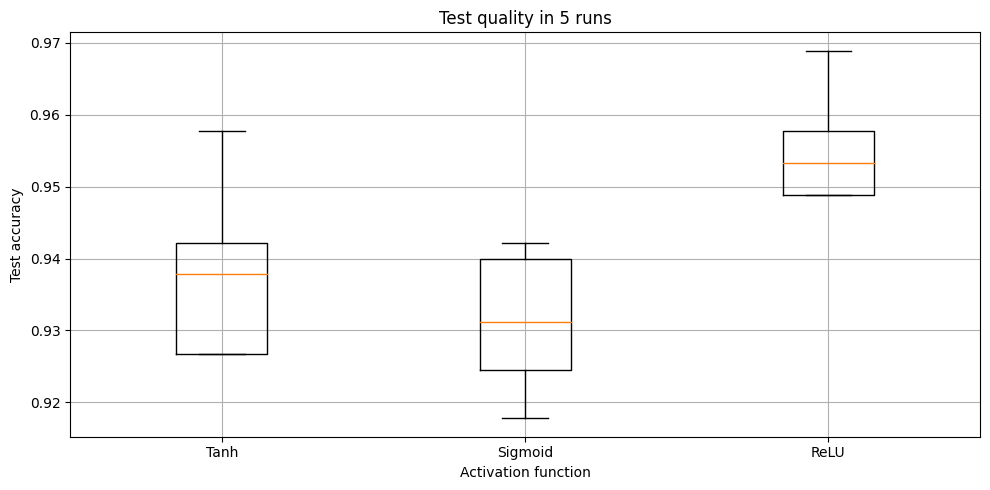

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

Лучше всего себя показала функция активации ReLU, что и не удивительно, так как она более способствует решению проблемы затухания градиента, нежели сигмоида или гиперболический тангенс. Видно, что процесс обучения был самым устойчивым для функции активации ReLU. Самым неустойчивым - для сигмоиды.

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [152]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']

    net, X, y = args

    grad = None
    iter = 0

    while True:
        batches = np.arange(X.shape[0])
        np.random.shuffle(batches)
        for i in range(0, batches.shape[0], batch_size):
            if iter >= n_iter:
                return OptimizeResult({'x': x0, 'success': True})

            if i + batch_size > batches.shape[0]:
                i = batches.shape[0] - batch_size
            if jac:
                grad_batch = fun(x0, [net, X[batches[i : i + batch_size], :], y[batches[i : i + batch_size]]])[1]
            else:
                return OptimizeResult({'x': x0, 'success': False})

            if grad is None:
                grad = grad_batch

            if mu != 0 and iter > 0:
                grad = mu * grad + grad_batch
            else:
                grad = grad_batch

            x0 = x0 - gamma * grad
            callback(x0)
            iter += 1

In [153]:
print(X.shape)

(1797, 64)


**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [154]:
# your code is here
network = make_network(input_size=X_train.shape[1],
                       output_size=10,
                       n_layers=3,
                       hidden_layers_size=32,
                       activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = SGD(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          n_iter=5000,
          momentum=0.9,
          lr=0.01,
          batch_size=64)
print('Test accuracy: ', cb.test_acc[-1])

Test accuracy:  0.96


In [155]:
res['success']

True

**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. L-BFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [169]:
from time import time
from tqdm import tqdm

lrs = [1e-3, 2e-2, 1e-2, 2e-1, 1e-1]
batches = np.array([8, 32])
momentums = np.array([0, 0.9])
n_iterations = 5000

In [170]:
results = {'L-BFGS-B': {'test_acc': [],
                        'train_acc': [],
                        'time': []},
           'SGD': {'test_acc': [],
                   'train_acc': [],
                   'time': [],
                   'params': []},
           'SGD_momentum': {'test_acc': [],
                            'train_acc': [],
                            'time': [],
                            'params': []}
           }

In [171]:
# L-BFGS-B
network = make_network(input_size=X_train.shape[1],
                       output_size=10,
                       n_layers=3,
                       hidden_layers_size=32,
                       activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time()
res = minimize(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method='L-BFGS-B',
          jac=True,
          callback=cb.call)
result_time = time() - start_time
results['L-BFGS-B']['test_acc'].append(cb.test_acc[-1])
results['L-BFGS-B']['train_acc'].append(cb.train_acc[-1])
results['L-BFGS-B']['time'].append(result_time)

In [172]:
# SGD and SGD momentum
for lr in tqdm(lrs):
    for momentum in momentums:
        for batch in batches:
            network = make_network(input_size=X_train.shape[1],
                        output_size=10,
                        n_layers=3,
                        hidden_layers_size=32,
                        activation_class=ReLU)
            initialize_network(network, 'Kaiming')
            weights = get_weights(network)
            cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

            start_time = time()
            res = SGD(compute_loss_grad, weights,
                    args=[network, X_train, y_train],
                    method=SGD,
                    jac=True,
                    callback=cb.call,
                    n_iter=n_iterations,
                    momentum=momentum,
                    lr=lr,
                    batch_size=batch)
            result_time = time() - start_time
            if not momentum:
                name = 'SGD'
            else:
                name = 'SGD_momentum'

            results[name]['test_acc'].append(cb.test_acc[-1])
            results[name]['train_acc'].append(cb.train_acc[-1])
            results[name]['time'].append(result_time)
            results[name]['params'].append({'lr': lr,
                                            'batch_size': batch,
                                            'momentum': momentum,
                                            'n_iter': n_iterations})

100%|██████████| 5/5 [09:24<00:00, 112.81s/it]


In [173]:
# L-BFGS-B

print('Test accuracy:', results['L-BFGS-B']['test_acc'][-1])
print('Train accuracy:', results['L-BFGS-B']['train_acc'][-1])
print('Time:', results['L-BFGS-B']['time'][-1])

Test accuracy: 0.9555555555555556
Train accuracy: 1.0
Time: 0.7278311252593994


In [174]:
# SGD

print('Best test accuracy:', np.max(np.array(results['SGD']['test_acc'])))
print('Best train accuracy:', np.max(np.array(results['SGD']['train_acc'])))
print('Fastest time:', np.min(np.array(results['SGD']['time'])))

Best test accuracy: 0.9688888888888889
Best train accuracy: 1.0
Fastest time: 26.762004852294922


In [175]:
# SGD

index_sgd = np.argmax(np.array(results['SGD']['test_acc']))

print('Best learning rate:', results['SGD']['params'][index_sgd]['lr'])
print('Best batch size:', results['SGD']['params'][index_sgd]['batch_size'])

Best learning rate: 0.01
Best batch size: 8


In [176]:
# SGD with momentum

print('Best test accuracy:', np.max(np.array(results['SGD_momentum']['test_acc'])))
print('Best train accuracy:', np.max(np.array(results['SGD_momentum']['train_acc'])))
print('Fastest time:', np.min(np.array(results['SGD_momentum']['time'])))

Best test accuracy: 0.9466666666666667
Best train accuracy: 1.0
Fastest time: 26.397481203079224


In [177]:
# SGD with momentum

index_sgdm = np.argmax(np.array(results['SGD_momentum']['test_acc']))

print('Best learning rate:', results['SGD_momentum']['params'][index_sgdm]['lr'])
print('Best batch size:', results['SGD_momentum']['params'][index_sgdm]['batch_size'])

Best learning rate: 0.001
Best batch size: 8


In [178]:
results

{'L-BFGS-B': {'test_acc': [0.9555555555555556],
  'train_acc': [1.0],
  'time': [0.7278311252593994]},
 'SGD': {'test_acc': [0.9022222222222223,
   0.9066666666666666,
   0.9533333333333334,
   0.9666666666666667,
   0.9688888888888889,
   0.9377777777777778,
   0.1,
   0.08444444444444445,
   0.1,
   0.08222222222222222],
  'train_acc': [0.9806978470675576,
   0.9658500371195249,
   0.9992576095025983,
   1.0,
   1.0,
   1.0,
   0.10244988864142539,
   0.10616184112843356,
   0.10244988864142539,
   0.10467706013363029],
  'time': [27.99001121520996,
   39.8869423866272,
   26.92080020904541,
   28.116203546524048,
   27.838063955307007,
   29.182504415512085,
   26.762004852294922,
   28.304526805877686,
   27.181432962417603,
   27.776927709579468],
  'params': [{'lr': 0.001, 'batch_size': 8, 'momentum': 0.0, 'n_iter': 5000},
   {'lr': 0.001, 'batch_size': 32, 'momentum': 0.0, 'n_iter': 5000},
   {'lr': 0.02, 'batch_size': 8, 'momentum': 0.0, 'n_iter': 5000},
   {'lr': 0.02, 'batch_

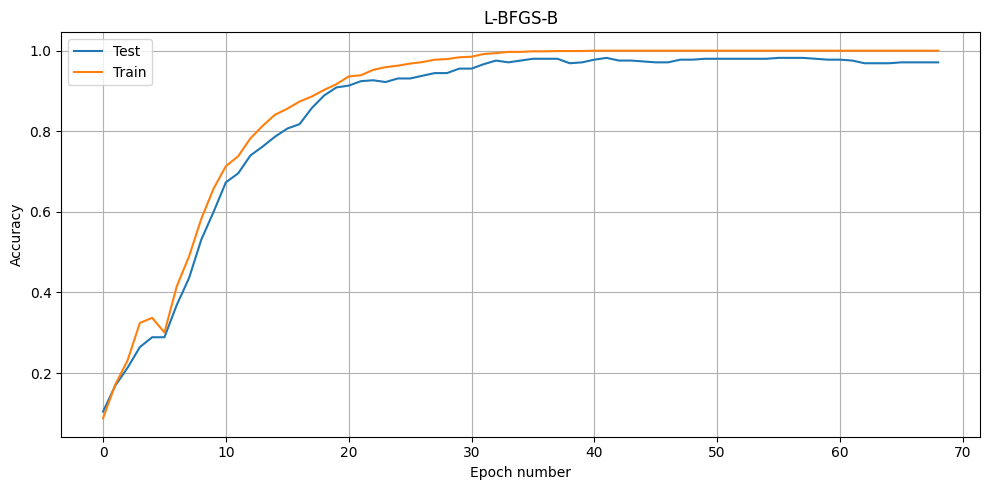

In [179]:
# L-BFGS-B chart
network = make_network(input_size=X_train.shape[1],
                       output_size=10,
                       n_layers=3,
                       hidden_layers_size=32,
                       activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

res = minimize(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method='L-BFGS-B',
          jac=True,
          callback=cb.call)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(cb.test_acc, label='Test')
ax.plot(cb.train_acc, label='Train')
ax.set_title("L-BFGS-B")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

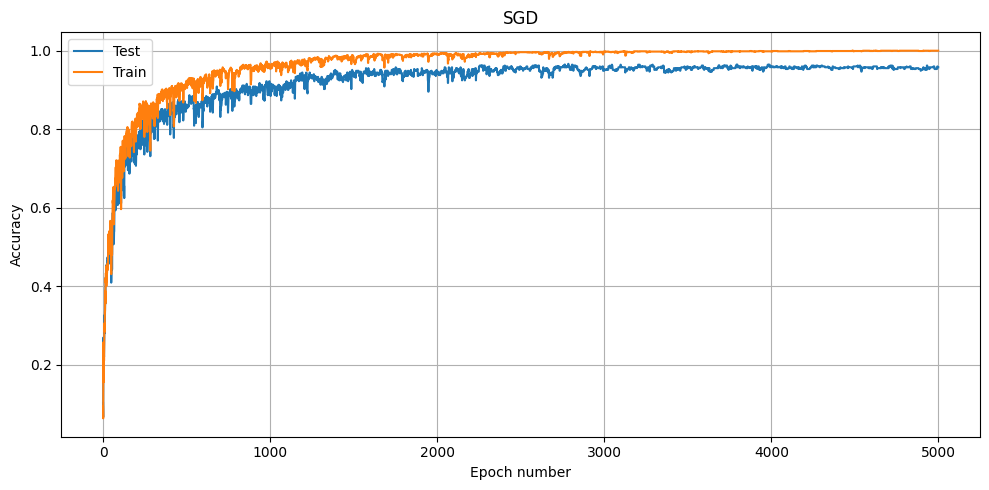

In [184]:
# SGD chart
network = make_network(input_size=X_train.shape[1],
                        output_size=10,
                        n_layers=3,
                        hidden_layers_size=32,
                        activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time()
res = SGD(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          n_iter=5000,
          momentum=0,
          lr=results['SGD']['params'][index_sgd]['lr'],
          batch_size=results['SGD']['params'][index_sgd]['batch_size'])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(cb.test_acc, label='Test')
ax.plot(cb.train_acc, label='Train')
ax.set_title("SGD")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

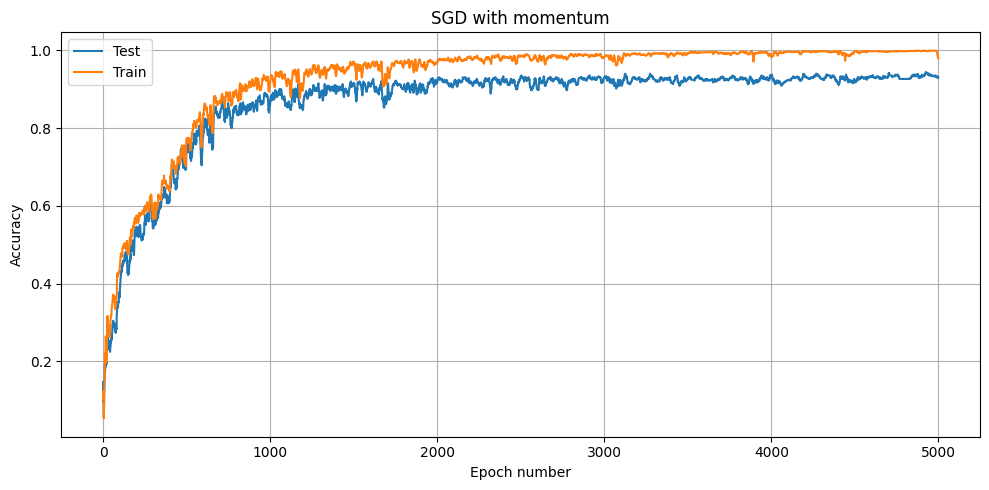

In [181]:
# SGD with momentum chart
network = make_network(input_size=X_train.shape[1],
                        output_size=10,
                        n_layers=3,
                        hidden_layers_size=32,
                        activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time()
res = SGD(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          n_iter=5000,
          momentum=0.9,
          lr=results['SGD_momentum']['params'][index_sgdm]['lr'],
          batch_size=results['SGD_momentum']['params'][index_sgdm]['batch_size'])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(cb.test_acc, label='Test')
ax.plot(cb.train_acc, label='Train')
ax.set_title("SGD with momentum")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Выводы:**

Самым быстрым оказался L-BFGS-B с показателем времени в 2 секунды

SGD показал лучшее качество. При этом он медленнее, чем SGD with momentum, который в данном эксперименте с данной инициализацией весов показал худший результат по точности.

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

In [185]:
# SGD batch 8
network = make_network(input_size=X_train.shape[1],
                        output_size=10,
                        n_layers=3,
                        hidden_layers_size=32,
                        activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time()
res = SGD(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          n_iter=5000,
          momentum=0,
          lr=results['SGD']['params'][index_sgd]['lr'],
          batch_size=8)

sgd_test8 = cb.test_acc
sgd_train8 = cb.train_acc

In [186]:
# SGD batch 8
network = make_network(input_size=X_train.shape[1],
                        output_size=10,
                        n_layers=3,
                        hidden_layers_size=32,
                        activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time()
res = SGD(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          n_iter=5000,
          momentum=0,
          lr=results['SGD']['params'][index_sgd]['lr'],
          batch_size=32)

sgd_test32 = cb.test_acc
sgd_train32 = cb.train_acc

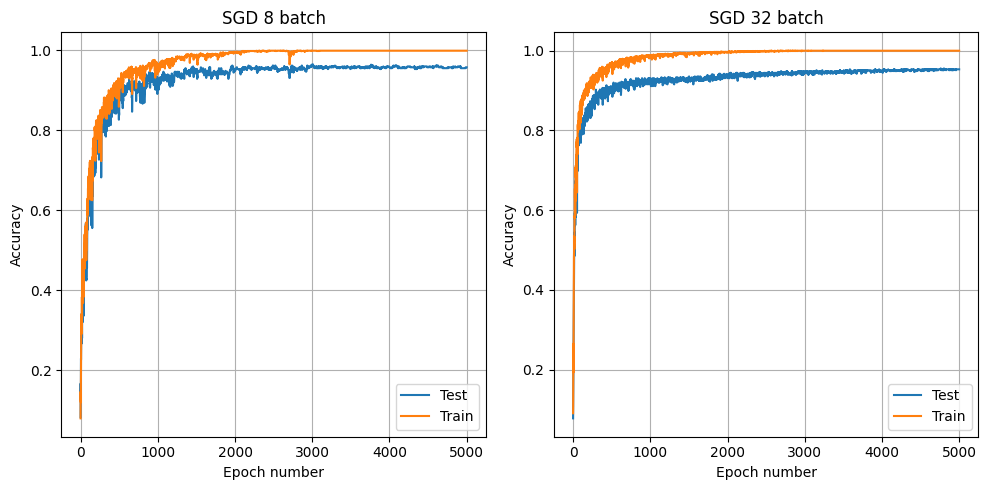

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(sgd_test8, label='Test')
ax[0].plot(sgd_train8, label='Train')

ax[1].plot(sgd_test32, label='Test')
ax[1].plot(sgd_train32, label='Train')

for i in range(2):
    ax[i].set_title(f"SGD {8 + i * 24} batch")
    ax[i].set_xlabel("Epoch number")
    ax[i].set_ylabel("Accuracy")
    ax[i].grid(True)
    ax[i].legend()

fig.tight_layout()
plt.show()

In [190]:
# SGD momentum batch 8
network = make_network(input_size=X_train.shape[1],
                        output_size=10,
                        n_layers=3,
                        hidden_layers_size=32,
                        activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time()
res = SGD(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          n_iter=5000,
          momentum=0,
          lr=results['SGD_momentum']['params'][index_sgdm]['lr'],
          batch_size=8)

sgdm_test8 = cb.test_acc
sgdm_train8 = cb.train_acc

In [191]:
# SGD momentum batch 32
network = make_network(input_size=X_train.shape[1],
                        output_size=10,
                        n_layers=3,
                        hidden_layers_size=32,
                        activation_class=ReLU)
initialize_network(network, 'Kaiming')
weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time()
res = SGD(compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          n_iter=5000,
          momentum=0,
          lr=results['SGD_momentum']['params'][index_sgdm]['lr'],
          batch_size=32)

sgdm_test32 = cb.test_acc
sgdm_train32 = cb.train_acc

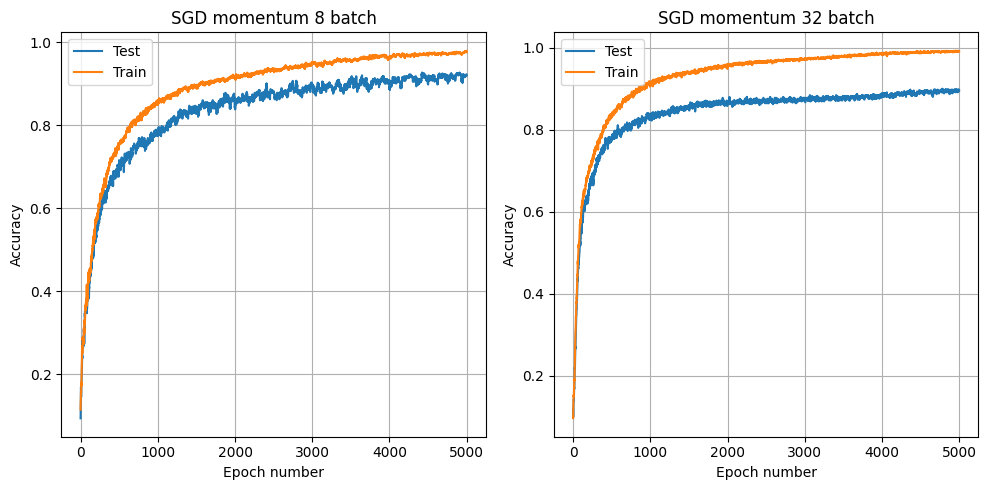

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(sgdm_test8, label='Test')
ax[0].plot(sgdm_train8, label='Train')

ax[1].plot(sgdm_test32, label='Test')
ax[1].plot(sgdm_train32, label='Train')

for i in range(2):
    ax[i].set_title(f"SGD momentum {8 + i * 24} batch")
    ax[i].set_xlabel("Epoch number")
    ax[i].set_ylabel("Accuracy")
    ax[i].grid(True)
    ax[i].legend()

fig.tight_layout()
plt.show()

**Ответ:**

Видно, что больший размер батча делает обучение более стабильным. Это выполнено как для SGD, так и для SGD с инерцией. Хотя и не всегда увеличение размера батча даёт лучшее качество, как видно по SGD с инерцией.


## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.